## 1. Calling geemap

In [1]:
import ee
ee.Initialize()
import os
import geemap
Map = geemap.Map()

## 2. Define the POI ( Triangle Region of NC: Durham, Wake, and Orange Counties)

In [2]:
# Define the rectangle geometry
latitude = 35.913200
longitude= -79.055847
rtp = ee.Geometry.Point([longitude, latitude])

# define ROI
roi = ee.Geometry.Polygon(
    [
        [
            [-79.127376, 36.058690], 
            [-78.439375, 36.058690], 
            [-78.439375, 35.541565], 
            [-79.139617, 35.541565], 
                        
        ]
    ],
    None,
    False,
)

# Print the geometry to check it
print(rtp.getInfo())

# Get the pixel area image
pixelArea = ee.Image.pixelArea()

# Calculate the total area of the AOI in square meters
totalArea = pixelArea.reduceRegion(
  reducer=ee.Reducer.sum(),
  geometry=roi,
  scale=roi.projection().nominalScale(),
  maxPixels=1e13
).get('area')

print('Total area of AOI:', totalArea.getInfo(), 'square meters')

{'type': 'Point', 'coordinates': [-79.055847, 35.9132]}
Total area of AOI: 3473740563.07451 square meters


## 3. Calling Satellites 

## Landsat

## Call 2007 Image. This image will be used to train the model

In [3]:
#2018
landsat = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2")
landsatImage = landsat.filterDate('2018-10-01', '2018-10-30').filterBounds(rtp)
landsatImage = landsatImage.sort('CLOUD_COVER')

landsatBands = ['SR_B3', 'SR_B2', 'SR_B1']
im2018=landsatImage.first()
im2018 = im2018.select('SR_B.').multiply(0.0000275).add(-0.2)
im2018=im2018.clip(roi)
trueColor = {
  'dimensions': 500,  
  'bands': ['SR_B4', 'SR_B3', 'SR_B2'],
  'min': 0,
  'max': 0.3,
}
Map.addLayer(im2018, trueColor, name='2018')
Map.centerObject(im2018, 10)
Map

Map(center=[35.799336436832874, -78.78645704174697], controls=(WidgetControl(options=['position', 'transparent…

## Make Polygons around Land Use Areas

In [4]:
# FOR Buildings: \
# how I did this: 
# 1. I zoomed into the Landsat image to a building area
# 2. Click on the polygon icon of the left, and define an area with points, forming a closed polygon
# 3. Run this cell. The last draw polygon is stored in "Map.user_roi"
polygon = Map.user_roi

# Or you can enter defined coordinates as the commented lines below.
# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.6828, 35.8410],
                   [-78.6812, 35.8422],
                   [-78.6779, 35.8398],
                   [-78.6799, 35.8386]]);

#Create a Feature from the Geometry.
building = ee.Feature(polygon, {'class': 0, 'name': 'building'});
Map.addLayer(building, {'fill_color':'pink', 'outline': 1}, name='building')


#Second building
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.9599, 35.9666],
                   [-78.9568, 35.9677],
                   [-78.9562, 35.9671],
                   [-78.9596, 35.9659]]);
                   

# // Create a Feature from the Geometry.
building2 = ee.Feature(polygon, {'class': 0, 'name': 'building2'});
Map.addLayer(building2, {'fill_color':'pink', 'outline': 1}, name='building2')



#Third building
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.6135, 35.8244],
                   [-78.6120, 35.8238],
                   [-78.6129, 35.8229],
                   [-78.6143, 35.8237]]);
                   

# // Create a Feature from the Geometry.
building3 = ee.Feature(polygon, {'class': 0, 'name': 'building3'});
Map.addLayer(building3, {'fill_color':'pink', 'outline': 1}, name='building3')



#Fourth building
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.8101, 35.8387],
                   [-78.8066, 35.8373],
                   [-78.8074, 35.8362],
                   [-78.8107, 35.8375]]);
                   

# // Create a Feature from the Geometry.
building4 = ee.Feature(polygon, {'class': 0, 'name': 'building4'});
Map.addLayer(building4, {'fill_color':'pink', 'outline': 1}, name='building4')


#Fifth building
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.872, 35.971],
                   [-78.870, 35.970],
                   [-78.872, 35.963],
                   [-78.875, 35.963]]);
                   

# // Create a Feature from the Geometry.
building5 = ee.Feature(polygon, {'class': 0, 'name': 'building5'});
Map.addLayer(building5, {'fill_color':'pink', 'outline': 1}, name='building5')


#Sixth building
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.848, 35.871],
                   [-78.845, 35.871],
                   [-78.845, 35.869],
                   [-78.848, 35.869]]);
                   

# // Create a Feature from the Geometry.
building6 = ee.Feature(polygon, {'class': 0, 'name': 'building6'});
Map.addLayer(building6, {'fill_color':'pink', 'outline': 1}, name='building6')


#Seventh building
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.855, 35.917],
                   [-78.854, 35.916],
                   [-78.856, 35.915],
                   [-78.857, 35.915]]);
                   

# // Create a Feature from the Geometry.
building7 = ee.Feature(polygon, {'class': 0, 'name': 'building7'});
Map.addLayer(building7, {'fill_color':'pink', 'outline': 1}, name='building7')
Map


Map(center=[35.799336436832874, -78.78645704174697], controls=(WidgetControl(options=['position', 'transparent…

In [5]:
# FOR Roads: \

#First Road
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.737, 35.767],
                   [-78.736, 35.767],
                   [-78.733, 35.764],
                   [-78.735, 35.763]]);

#Create a Feature from the Geometry.
road = ee.Feature(polygon, {'class': 1, 'name': 'road'});
Map.addLayer(road, {'fill_color':'grey', 'outline': 1}, name='road')


#Second road
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.910, 35.908],
                   [-78.901, 35.908],
                   [-78.901, 35.907],
                   [-78.909, 35.908]]);
                   

# // Create a Feature from the Geometry.
road2 = ee.Feature(polygon, {'class': 1, 'name': 'road2'});
Map.addLayer(road2, {'fill_color':'grey', 'outline': 1}, name='road2')


#Third road
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.594, 35.747],
                   [-78.593, 35.747],
                   [-78.586, 35.730],
                   [-78.587, 35.730]]);
                   

# // Create a Feature from the Geometry.
road3 = ee.Feature(polygon, {'class': 1, 'name': 'road3'});
Map.addLayer(road3, {'fill_color':'grey', 'outline': 1}, name='road3')


#Fourth road
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.761, 35.830],
                   [-78.760, 35.830],
                   [-78.743, 35.821],
                   [-78.744, 35.820]]);
                   

# // Create a Feature from the Geometry.
road4 = ee.Feature(polygon, {'class': 1, 'name': 'road4'});
Map.addLayer(road4, {'fill_color':'grey', 'outline': 1}, name='road4')


#Fifth road
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.665, 35.758],
                   [-78.663, 35.758],
                   [-78.663, 35.757],
                   [-78.665, 35.757]]);
                   

# // Create a Feature from the Geometry.
road5 = ee.Feature(polygon, {'class': 1, 'name': 'road5'});
Map.addLayer(road5, {'fill_color':'grey', 'outline': 1}, name='road5')
Map

Map(center=[35.799336436832874, -78.78645704174697], controls=(WidgetControl(options=['position', 'transparent…

In [6]:
# FOR Agricultural Fields: \

# First farmland
polygon = Map.user_roi


# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.706, 35.584],
                   [-78.702, 35.587],
                   [-78.702, 35.583],
                   [-78.704, 35.582]]);

#Create a Feature from the Geometry.
farmland = ee.Feature(polygon, {'class': 2, 'name': 'farmland'});
Map.addLayer(farmland, {'fill_color':'yellow', 'outline': 1}, name='farmland')


#Second farmland
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.661, 35.640],
                   [-78.656, 35.640],
                   [-78.656, 35.635],
                   [-78.661, 35.635]]);

#Create a Feature from the Geometry.
farmland2 = ee.Feature(polygon, {'class': 2, 'name': 'farmland2'});
Map.addLayer(farmland2, {'fill_color':'yellow', 'outline': 1}, name='farmland2')


#Third farmland
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.682, 35.556],
                   [-78.678, 35.552],
                   [-78.680, 35.551],
                   [-78.683, 35.554]]);

#Create a Feature from the Geometry.
farmland3 = ee.Feature(polygon, {'class': 2, 'name': 'farmland3'});
Map.addLayer(farmland3, {'fill_color':'yellow', 'outline': 1}, name='farmland3')


#Fourth farmland
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.832, 35.599],
                   [-78.828, 35.601],
                   [-78.827, 35.598],
                   [-78.829, 35.597]]);

#Create a Feature from the Geometry.
farmland4 = ee.Feature(polygon, {'class': 2, 'name': 'farmland4'});
Map.addLayer(farmland4, {'fill_color':'yellow', 'outline': 1}, name='farmland4')


#Fifth farmland
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.821, 35.573],
                   [-78.819, 35.573],
                   [-78.819, 35.570],
                   [-78.821, 35.570]]);

#Create a Feature from the Geometry.
farmland5 = ee.Feature(polygon, {'class': 2, 'name': 'farmland5'});
Map.addLayer(farmland5, {'fill_color':'yellow', 'outline': 1}, name='farmland5')

Map

Map(center=[35.799336436832874, -78.78645704174697], controls=(WidgetControl(options=['position', 'transparent…

In [7]:
# FOR Water: \

#First Water
polygon = Map.user_roi

# Or you can enter defined coordinates as the commented lines below.
# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-79.001, 35.816],
                   [-78.987, 35.808],
                   [-79.002, 35.794],
                   [-79.008, 35.802]]);

#Create a Feature from the Geometry.
water = ee.Feature(polygon, {'class': 3, 'name': 'water'});
Map.addLayer(water, {'fill_color':'blue', 'outline': 1}, name='water')

#Second Water
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.725, 36.034],
                   [-78.709, 36.034],
                   [-78.709, 36.017],
                   [-78.719, 36.017]]);

#Create a Feature from the Geometry.
water2 = ee.Feature(polygon, {'class': 3, 'name': 'water2'});
Map.addLayer(water2, {'fill_color':'blue', 'outline': 1}, name='water2')


#Third Water
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.804, 35.838],
                   [-78.788, 35.838],
                   [-78.788, 35.834],
                   [-78.804, 35.834]]);

#Create a Feature from the Geometry.
water3 = ee.Feature(polygon, {'class': 3, 'name': 'water3'});
Map.addLayer(water3, {'fill_color':'blue', 'outline': 1}, name='water3')

Map

Map(center=[35.799336436832874, -78.78645704174697], controls=(WidgetControl(options=['position', 'transparent…

In [8]:
# FOR Forest: \

#First Forest
polygon = Map.user_roi

# Or you can enter defined coordinates as the commented lines below.
# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.772, 35.853],
                   [-78.756, 35.861],
                   [-78.743, 35.844],
                   [-78.760, 35.839]]);

#Create a Feature from the Geometry.
forest = ee.Feature(polygon, {'class': 4, 'name': 'forest'});
Map.addLayer(forest, {'fill_color':'green', 'outline': 1}, name='forest')


#Second Forest
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.638, 35.998],
                   [-78.621, 35.999],
                   [-78.621, 35.990],
                   [-78.634, 35.991]]);

#Create a Feature from the Geometry.
forest2 = ee.Feature(polygon, {'class': 4, 'name': 'forest2'});
Map.addLayer(forest2, {'fill_color':'green', 'outline': 1}, name='forest2')


#Third Forest
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.995, 35.628],
                   [-78.985, 35.628],
                   [-78.985, 35.618],
                   [-78.995, 35.618]]);

#Create a Feature from the Geometry.
forest3 = ee.Feature(polygon, {'class': 4, 'name': 'forest3'});
Map.addLayer(forest3, {'fill_color':'green', 'outline': 1}, name='forest3')


#Fourth Forest
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.620, 35.962],
                   [-78.611, 35.961],
                   [-78.612, 35.958],
                   [-78.618, 35.959]]);

#Create a Feature from the Geometry.
forest4 = ee.Feature(polygon, {'class': 4, 'name': 'forest4'});
Map.addLayer(forest4, {'fill_color':'green', 'outline': 1}, name='forest4')
Map

Map(center=[35.799336436832874, -78.78645704174697], controls=(WidgetControl(options=['position', 'transparent…

In [9]:
# FOR Open Area/Grass: \

#First Grass
polygon = Map.user_roi

# Or you can enter defined coordinates as the commented lines below.
# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.775, 35.866],
                   [-78.771, 35.868],
                   [-78.767, 35.864],
                   [-78.770, 35.862]]);

#Create a Feature from the Geometry.
grass = ee.Feature(polygon, {'class': 5, 'name': 'grass'});
Map.addLayer(grass, {'fill_color':'lightgreen', 'outline': 1}, name='grass')

# Second Grass
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.719, 35.817],
                   [-78.715, 35.814],
                   [-78.719, 35.811],
                   [-78.721, 35.813]]);

#Create a Feature from the Geometry.
grass2 = ee.Feature(polygon, {'class': 5, 'name': 'grass2'});
Map.addLayer(grass2, {'fill_color':'lightgreen', 'outline': 1}, name='grass2')


# Third Grass
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.501, 36.036],
                   [-78.497, 36.034],
                   [-78.499, 36.032],
                   [-78.505, 36.031]]);

#Create a Feature from the Geometry.
grass3 = ee.Feature(polygon, {'class': 5, 'name': 'grass3'});
Map.addLayer(grass3, {'fill_color':'lightgreen', 'outline': 1}, name='grass3')


# Fourth Grass
polygon = Map.user_roi

# // Create an ee.Geometry.
polygon = ee.Geometry.Polygon([
                   [-78.683, 35.730],
                   [-78.679, 35.730],
                   [-78.680, 35.725],
                   [-78.683, 35.725]]);

#Create a Feature from the Geometry.
grass4 = ee.Feature(polygon, {'class': 5, 'name': 'grass4'});
Map.addLayer(grass4, {'fill_color':'lightgreen', 'outline': 1}, name='grass4')
Map

Map(center=[35.799336436832874, -78.78645704174697], controls=(WidgetControl(options=['position', 'transparent…

# Train Computer to recognize land use areas

In [10]:
trainingFeatures = ee.FeatureCollection([building, building2, building3, building4, building5, building6, building7, 
                                         road, road2, road3, road4, road5, 
                                         farmland, farmland2, farmland3, farmland4, farmland5, 
                                         water, water2, water3,
                                        forest, forest2, forest3, forest4,
                                        grass, grass2, grass3, grass4])

In [11]:
predictionBands = ['SR_B3', 'SR_B2', 'SR_B1', 'SR_B4', 'SR_B5', 'SR_B7']

In [12]:
print(trainingFeatures.first().getInfo())

{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-78.6828, 35.841], [-78.6799, 35.8386], [-78.6779, 35.8398], [-78.6812, 35.8422], [-78.6828, 35.841]]]}, 'id': '0', 'properties': {'class': 0, 'name': 'building'}}


In [13]:
classifierTraining = im2018.select(predictionBands).sampleRegions(
      collection= trainingFeatures, 
      properties= ['class'], 
      scale= 30
    );

In [14]:
# // Randomly split the data into 60% for training, and 40% for testing
trainingTesting = classifierTraining.randomColumn('random',111009);

training = trainingTesting.filter(ee.Filter.lt('random', 0.66));

testing = trainingTesting.filter(ee.Filter.gte('random', 0.66));

## Random Tree Classification

In [15]:
# RANDOM TREES

# hyperparameter to tune
trees_val=16

rfClassification = ee.Classifier.smileRandomForest(numberOfTrees=trees_val, seed=111009).train(
      features= training, 
      classProperty= 'class', 
      inputProperties= predictionBands
    )

In [16]:
# // Perform the RF regression on the landsat image
rfClassificationImage = im2018.select(predictionBands).classify(rfClassification);
    
# // Visualize the RF regression
Map.addLayer(rfClassificationImage,  {'min': 0, 'max': 5,
                                   'palette':['pink','grey','yellow','blue','green','lightgreen']}, 'RF classification');

Map

Map(bottom=103421.0, center=[35.799336436832874, -78.78645704174697], controls=(WidgetControl(options=['positi…

## Random Forest Accuracy

In [21]:
# // Perform the RF classification on the test set

# print(test.first().getInfo())
# // Get a confusion matrix representing expected accuracy.
test=testing.classify(rfClassification)
testAccuracy = test.errorMatrix('class', 'classification');

import numpy as np
errormaxtrix=np.array(testAccuracy.array().getInfo())

print(testAccuracy.name());
print(errormaxtrix)
print('Overall Accuracy:', testAccuracy.accuracy().getInfo());
print('Producers Accuracy:', testAccuracy.producersAccuracy().getInfo());
print('Consumers Accuracy:', testAccuracy.consumersAccuracy().getInfo());
print('Kappa:', testAccuracy.kappa().getInfo());

ConfusionMatrix
[[ 148   11    2    0    1   16]
 [   2  121    5    0   29    8]
 [   3    9  178    0    4   29]
 [   0    0    0 1868    0    0]
 [   0    7    8    0 2158    4]
 [   9   22   39    0   27  218]]
Overall Accuracy: 0.9522939504669102
Producers Accuracy: [[0.8314606741573034], [0.7333333333333333], [0.7982062780269058], [1], [0.9912723932016536], [0.692063492063492]]
Consumers Accuracy: [[0.9135802469135802, 0.711764705882353, 0.7672413793103449, 1, 0.9725101397025687, 0.7927272727272727]]
Kappa: 0.9265011483778901


# Figure out how many 'trees' are best for RF Classification

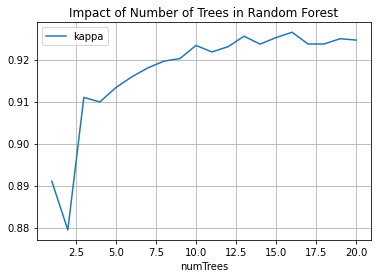

In [22]:
numTrees = ee.List.sequence(1, 20, 1)


def trees(t):
    rfclass = ee.Classifier.smileRandomForest(numberOfTrees=t, seed=111009).train(
    features= training, 
    classProperty= 'class', 
    inputProperties= predictionBands)
    
    rfTesting = testing.classify(rfclass)
    testAccuracy = rfTesting.errorMatrix('class', 'classification');
    kappa= testAccuracy.kappa();       
    return kappa


kappa_trees=numTrees.map(trees)
value_info = kappa_trees.getInfo()

# print(rmse_trees.getInfo())

import pandas as pd
df =pd.DataFrame(value_info,columns=['kappa'])
df['numTrees'] = numTrees.getInfo() 

ax =df.plot.line(x='numTrees', 
             y='kappa',
             title= 'Impact of Number of Trees in Random Forest'
             )
ax.grid()

## Add Legend to map

In [ ]:
#Define the legend labels and colors
legend_dict = {
    'buildings': '#ff69b4',
    'roads': '#808080',
    'farmland': '#ffff00',
    'water': '#0000ff',
    'forest': '#008000',
    'grass': '#90ee90',
}

# Add the legend to the map
Map.add_legend(legend_title='Legend', legend_dict=legend_dict)

# Display the map
Map

## Zonal Statistics

In [17]:
import ee
areaImage = ee.Image.pixelArea().addBands(
      rfClassificationImage)
areas = areaImage.reduceRegion(**{
    'reducer': ee.Reducer.sum().group(**{'groupField': 1, 'groupName': 'class'}),
    'geometry': rfClassificationImage.geometry(),
    'scale': 30,
    'maxPixels': 1e10
})
 
# Print the results
print('Total area by class:')
print(areas.getInfo())

Total area by class:
{'groups': [{'class': 0, 'sum': 80371065.65763728}, {'class': 1, 'sum': 409782558.82266486}, {'class': 2, 'sum': 276630574.82525915}, {'class': 3, 'sum': 128009327.8182691}, {'class': 4, 'sum': 2352844567.0698786}, {'class': 5, 'sum': 352226021.5753199}]}


## Convert to CSV Format

In [18]:
import pandas as pd
# Convert the result to a pandas DataFrame
df = pd.DataFrame(areas.getInfo()['groups'])

# Print the DataFrame
print(df.to_csv(index=False))

class,sum
0,80371065.6576373
1,409782558.8226649
2,276630574.8252591
3,128009327.8182691
4,2352844567.0698786
5,352226021.5753199

